In [1]:
#1) Problem statement
#This project understands how the student's performance (test scores) is affected by other 
#variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation
#course.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
#lets see the top 5 records
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
df.shape
# the data has 1000 rows and 8 columns

(1000, 8)

In [11]:
df.isnull().sum()
# there are no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
df.duplicated().sum()
#no duplicates

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [39]:
df.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [58]:
print("categories in gender :")
print(df['gender'].unique())
print("---------------------------------------")

print("categories in race/ethnicity :")
print(df['race/ethnicity'].unique())
print("---------------------------------------")

print("categories in parental level of education :")
print(df['parental level of education'].unique())
print("---------------------------------------")

print("categories in lunch :")
print(df['lunch'].unique())
print("---------------------------------------")

print("categories in test preparation course :")
print(df['test preparation course'].unique())
print("---------------------------------------")

categories in gender :
['female' 'male']
---------------------------------------
categories in race/ethnicity :
['group B' 'group C' 'group A' 'group D' 'group E']
---------------------------------------
categories in parental level of education :
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
---------------------------------------
categories in lunch :
['standard' 'free/reduced']
---------------------------------------
categories in test preparation course :
['none' 'completed']
---------------------------------------


In [79]:
#defining numerical and categorical features
categorical_features=[i for i in df.columns if df[i].dtype=='O' ]
numerical_features=[i for i in df.columns if df[i].dtype!='O' ]
print('categorical features are:{}'.format(categorical_features))
print('numerical features are:{}'.format(numerical_features))

categorical features are:['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical features are:['math score', 'reading score', 'writing score']


In [81]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [85]:
df['Total score']=df['math score']+df['reading score']+df['writing score']
df['Average']=(df['math score']+df['reading score']+df['writing score'])/3

In [103]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [110]:
(df['math score']==100)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: math score, Length: 1000, dtype: bool

In [118]:
df['Average']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64

<AxesSubplot:xlabel='Average', ylabel='Count'>

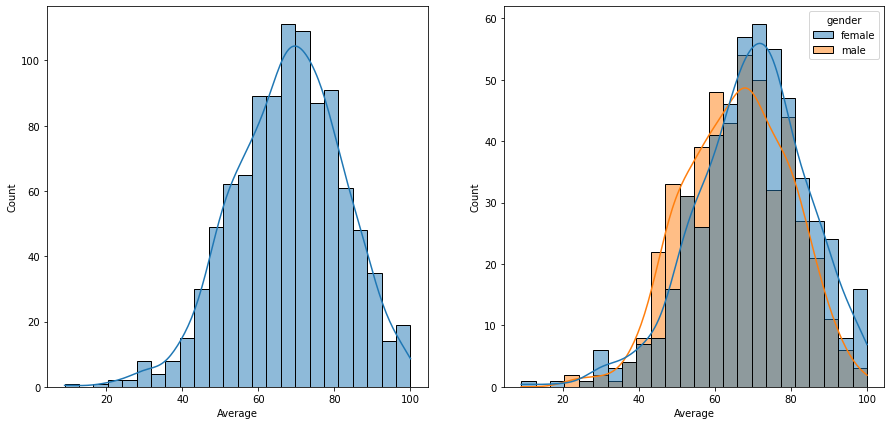

In [141]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],kde=True,hue='gender')

<AxesSubplot:xlabel='Average', ylabel='Count'>

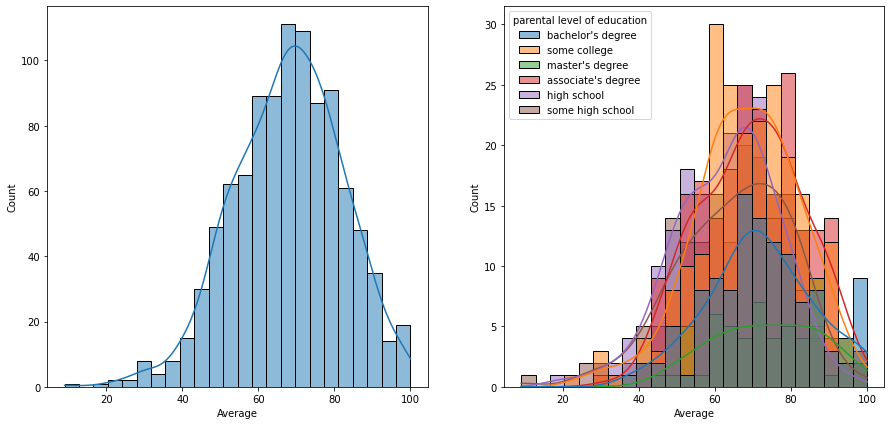

In [142]:
plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x=df['Average'],kde=True)
plt.subplot(122)
sns.histplot(data=df,x=df['Average'],kde=True,hue='parental level of education')

<AxesSubplot:title={'center':'writing score'}, ylabel='writing score'>

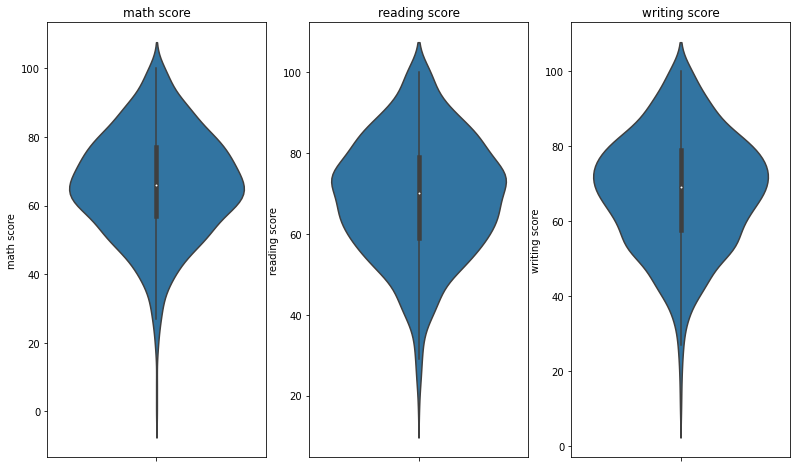

In [156]:
#Violin plot
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title("math score")
sns.violinplot(y='math score',data=df)

plt.subplot(1, 4, 2)
plt.title("reading score")
sns.violinplot(y='reading score',data=df)

plt.subplot(1, 4, 3)
plt.title("writing score")
sns.violinplot(y='writing score',data=df)


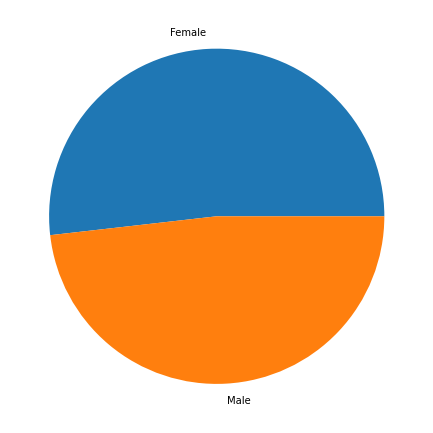

In [193]:
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Female', 'Male'
plt.pie(size,labels=labels)



plt.tight_layout()
plt.show()

<Figure size 1800x432 with 0 Axes>

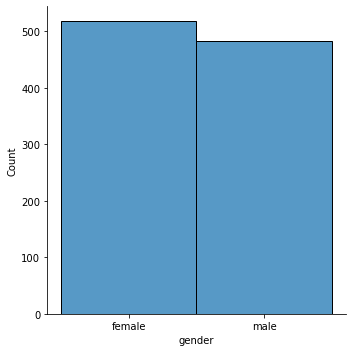

In [209]:
plt.figure(figsize=(25,6))
sns.displot(data=df,x='gender')

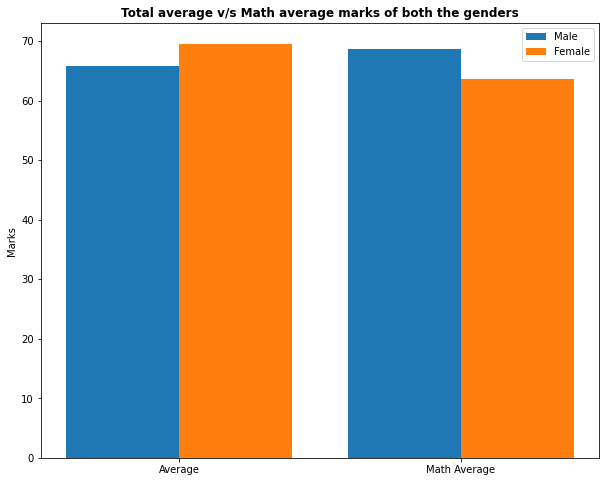

In [213]:
gender_group = df.groupby('gender').mean()
plt.figure(figsize=(10, 8))

X = ['Average','Math Average']


female_scores = [gender_group['Average'][0], gender_group['math score'][0]]
male_scores = [gender_group['Average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

In [233]:
#gender

pd.DataFrame(df['Average'])

,Average
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


<Figure size 1800x432 with 0 Axes>

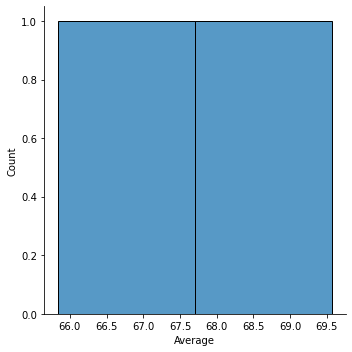

In [249]:
plt.figure(figsize=(25,6))

sns.displot(data=df,x=(df.groupby('gender').mean().Average))

In [236]:
df.groupby('gender').mean()

,math score,reading score,writing score,Total score,Average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [253]:
gender_group=(df.groupby('gender').mean().Average)
gender_group

gender
female    69.569498
male      65.837483
Name: Average, dtype: float64

In [ ]:
Math_avg=

In [257]:
gender_group[0]

69.56949806949807